#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('./boston_clean.csv')

##### CHANGING TYPE OF COLUMNS THAT USING TIME AS VALUES

In [5]:
time_columns = ['Pace', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
df[time_columns] = df[time_columns].apply(lambda col: pd.to_timedelta(col, errors='coerce'))

# UNIVARIATE

## Official time

In [8]:
official_time = df['Official Time']

In [9]:
# official finish time
time_fastest = official_time.min()
time_longest = official_time.max()
time_avg = official_time.mean()
time_med = official_time.median()

print('OFFICIAL FINISH TIME STATISTICS')
print(f"Fastest time in marathon is: {str(time_fastest)[7:]}")
print(f"Longest time in marathon is: {str(time_longest)[7:]}")
print(f"Average time in marathon is: {str(time_avg)[7:15]}")
print(f"Median time in marathon is: {str(time_med)[7:]}")

OFFICIAL FINISH TIME STATISTICS
Fastest time in marathon is: 02:09:17
Longest time in marathon is: 10:30:23
Average time in marathon is: 03:53:09
Median time in marathon is: 03:46:32


### visualization

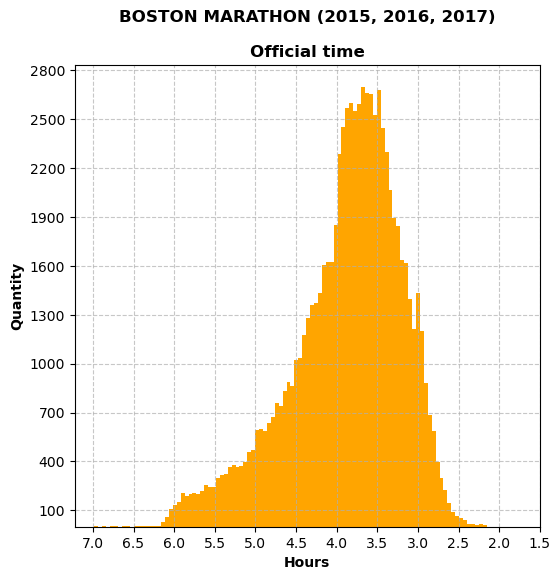

In [11]:
official_time_inhours = official_time.dt.total_seconds() / 3600
threshold = 7
official_time_inhours_filtered = official_time_inhours[official_time_inhours < threshold]

plt.figure(figsize=(6,6))

plt.hist(official_time_inhours_filtered, bins=100, color='orange')
plt.gca().invert_xaxis()
plt.xticks(np.arange(7, 1, -0.5))
plt.yticks(np.arange(100,2801,300))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Hours', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nOfficial time', fontweight='bold')

plt.savefig("./vexport/officialtime.png", dpi=300, bbox_inches='tight')
plt.show()

#### export